In [34]:
#Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Plot styling
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('ggplot')
#Read the csv file
dataset=pd.read_csv('C:\\path\\Dt.csv') 

In [35]:
#Explore the dataset
dataset.head()#top 5 columns

,time_period,count_of_returns,avg_time_between_returns_to_player
0,Month 1,0,0.0
1,Month 1,2,4.5
2,Month 1,0,0.0
3,Month 1,1,0.0
4,Month 1,0,0.0


In [36]:
#descriptive statistics of the dataset
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
count_of_returns,33280.0,1.158774,1.536274,0.0,0.0,1.0,1.0,30.0
avg_time_between_returns_to_player,33280.0,1.021761,3.057907,0.0,0.0,0.0,0.0,30.0


Text(0.5, 0, 'Avg time / Returns')

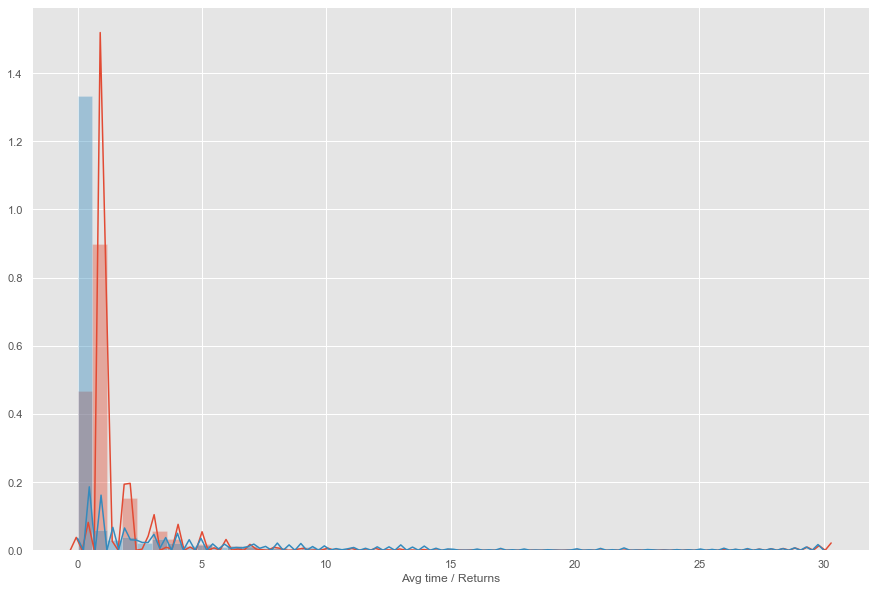

In [37]:
#Visualizing the data - displot
plot_income = sns.distplot(dataset["count_of_returns"])
plot_spend = sns.distplot(dataset["avg_time_between_returns_to_player"])
plt.xlabel('Avg time / Returns')

[(-5, 20)]

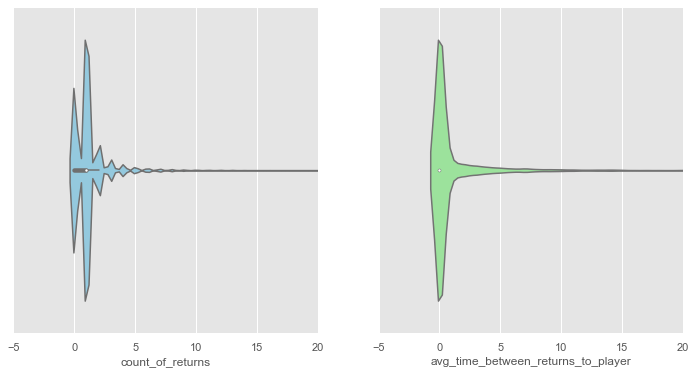

In [38]:
#Violin plot of Income and Spend
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=dataset, x='count_of_returns', color="skyblue",ax=axes[0])
v2 = sns.violinplot(data=dataset, x='avg_time_between_returns_to_player',color="lightgreen", ax=axes[1])
v1.set(xlim=(-5,20))

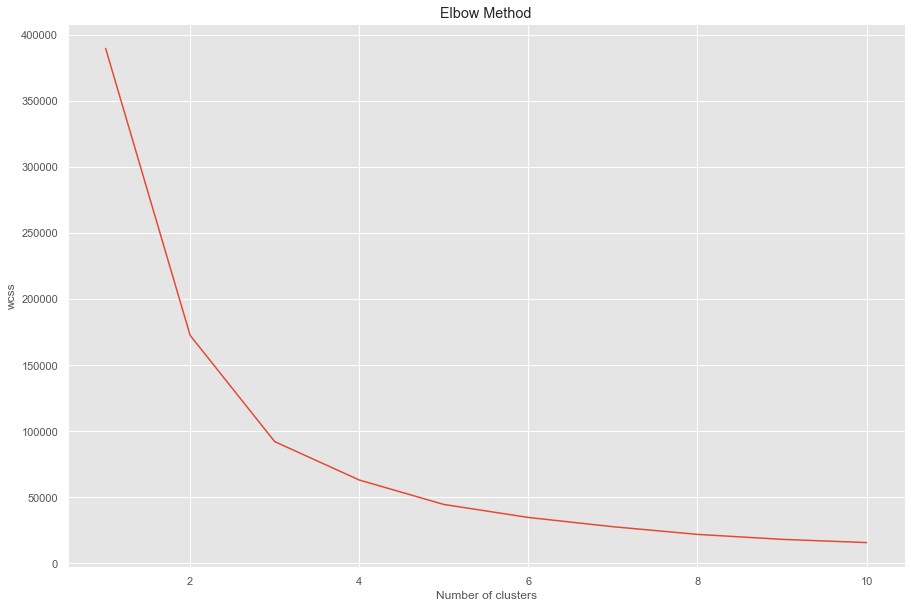

In [39]:
#Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

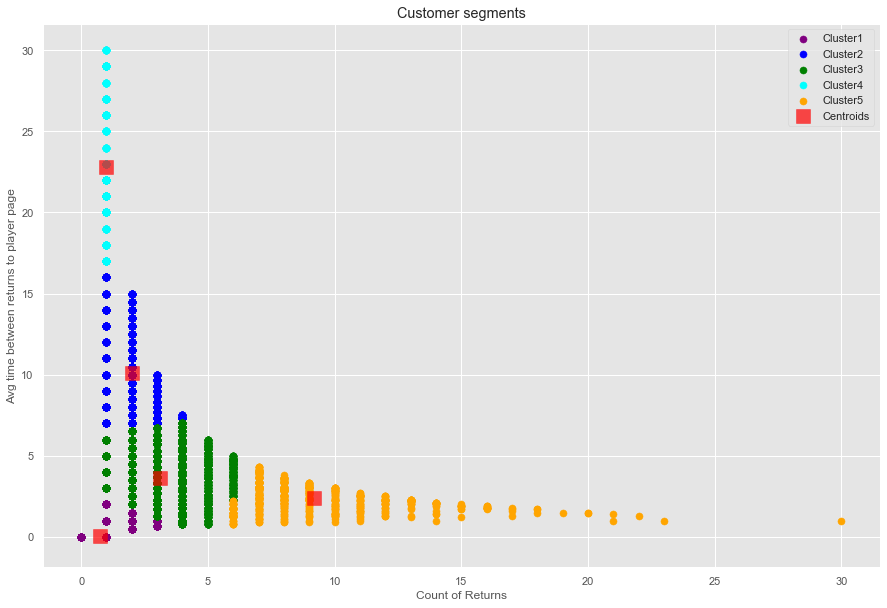

In [40]:
##Fitting kmeans to the dataset with k=5
km4=KMeans(n_clusters=5,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)
#Visualizing the clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='orange',label='Cluster5')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Count of Returns')
plt.ylabel('Avg time between returns to player page')
plt.legend()
plt.show()

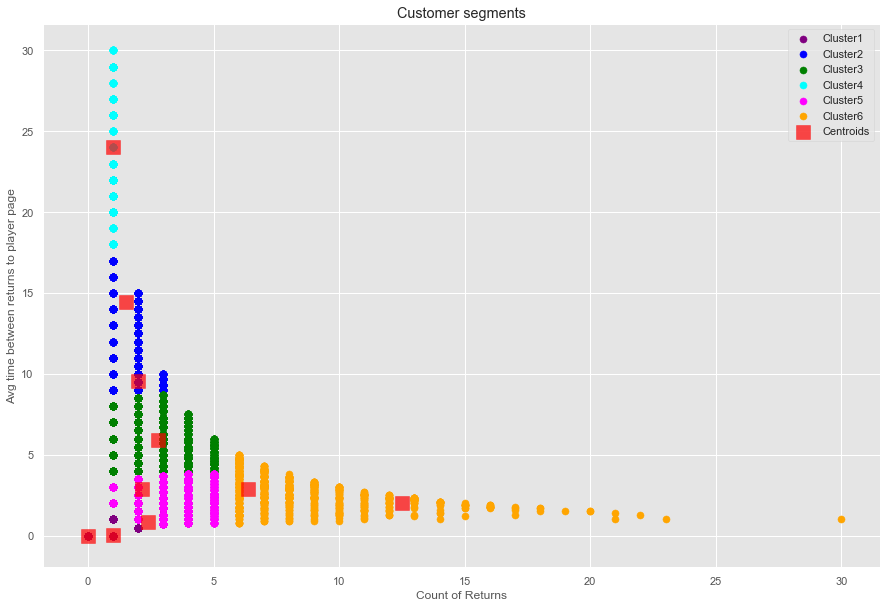

In [41]:
##Fitting kmeans to the dataset - k=6
km4=KMeans(n_clusters=6,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)
#Visualizing the clusters
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='magenta',label='Cluster5')
plt.scatter(X[y_means==5,0],X[y_means==5,1],s=50, c='orange',label='Cluster6')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Count of Returns')
plt.ylabel('Avg time between returns to player page')
plt.legend()
plt.show()